# Work with several layers in your maps with Python

Author: Damián Zamora Rivas
<br>This script is part of a tutorial wrote in my Medium blog: **https://damzar.medium.com/**

If ypu want to read the tutorial:
* **English version**: To be published
* **Versión en español**: https://link.medium.com/x5Yf6zfVlkb

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Reading and preparing data

In [2]:
yucatan = gpd.read_file('yucatan/municipios.shp')
yucatan

,fid,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,NOM_MUN,Area,PERIMETER,COV_,COV_ID,municipios,geometry
0,6.0,31001,31,001,YucatÃ¡n,AbalÃ¡,29023.783001,121.497890,2234.0,2235.0,946800,"POLYGON ((-89.66875 20.72618, -89.65565 20.711..."
1,7.0,31002,31,002,YucatÃ¡n,Acanceh,13606.331230,111.648270,2235.0,2236.0,741600,"POLYGON ((-89.45571 20.91324, -89.45216 20.908..."
2,8.0,31003,31,003,YucatÃ¡n,Akil,7587.159221,52.015579,2236.0,2237.0,30000,"POLYGON ((-89.35315 20.32405, -89.35300 20.323..."
3,9.0,31004,31,004,YucatÃ¡n,Baca,10747.849468,81.026250,2237.0,2238.0,793000,"POLYGON ((-89.41583 21.22625, -89.40978 21.225..."
4,10.0,31005,31,005,YucatÃ¡n,BokobÃ¡,7106.498377,54.745168,2238.0,2239.0,135000,"POLYGON ((-89.16865 21.05597, -89.16863 21.055..."
...,...,...,...,...,...,...,...,...,...,...,...,...
101,107.0,31097,31,097,YucatÃ¡n,TunkÃ¡s,40960.821510,118.576824,2335.0,2336.0,122800,"POLYGON ((-88.70296 21.02239, -88.70360 21.010..."
102,108.0,31098,31,098,YucatÃ¡n,Tzucacab,76023.971250,201.061404,2336.0,2337.0,16000,"POLYGON ((-88.95851 19.81691, -88.96048 19.817..."
103,109.0,31099,31,099,YucatÃ¡n,Uayma,18606.223249,152.930964,2337.0,2338.0,752800,"POLYGON ((-88.35081 20.89314, -88.35033 20.892..."
104,110.0,31105,31,105,YucatÃ¡n,Yaxkukul,4905.555863,48.159077,2338.0,2339.0,285400,"POLYGON ((-89.43052 21.08952, -89.42991 21.089..."


There are useless columns, so we are going to erase them. <br> Then we change the name of the column 'municipios' for 'sales', which is in fact, the sales recorded by the brand.

In [3]:
yucatan = yucatan.drop(columns = ['fid','CVEGEO','CVE_ENT','NOM_ENT','Area','PERIMETER','COV_','COV_ID'])
yucatan.rename(columns = {'municipios':'sales'}, inplace = True)

Now we have a reduced geodataframe, with only three columns

In [4]:
yucatan

,CVE_MUN,NOM_MUN,sales,geometry
0,001,AbalÃ¡,946800,"POLYGON ((-89.66875 20.72618, -89.65565 20.711..."
1,002,Acanceh,741600,"POLYGON ((-89.45571 20.91324, -89.45216 20.908..."
2,003,Akil,30000,"POLYGON ((-89.35315 20.32405, -89.35300 20.323..."
3,004,Baca,793000,"POLYGON ((-89.41583 21.22625, -89.40978 21.225..."
4,005,BokobÃ¡,135000,"POLYGON ((-89.16865 21.05597, -89.16863 21.055..."
...,...,...,...,...
101,097,TunkÃ¡s,122800,"POLYGON ((-88.70296 21.02239, -88.70360 21.010..."
102,098,Tzucacab,16000,"POLYGON ((-88.95851 19.81691, -88.96048 19.817..."
103,099,Uayma,752800,"POLYGON ((-88.35081 20.89314, -88.35033 20.892..."
104,105,Yaxkukul,285400,"POLYGON ((-89.43052 21.08952, -89.42991 21.089..."


### Time to plot

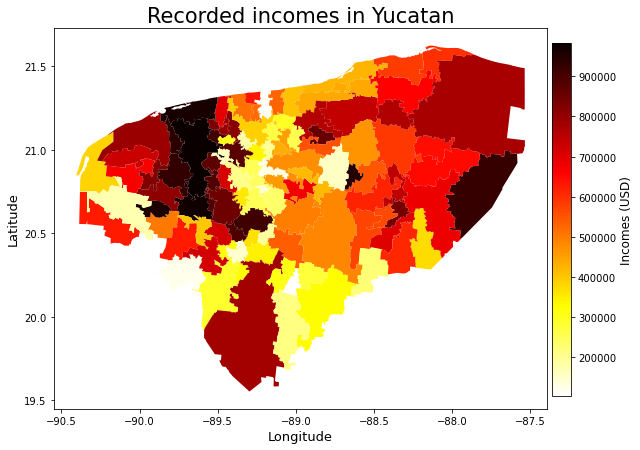

In [5]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

#Plot of the title
title = "Recorded incomes in Yucatan"
plt.title(title, fontsize=21)

#Map plotting
yucatan.plot(column='sales',  cmap = 'hot_r', ax = ax)

#Axes
ax.set_xlabel('Longitude', fontsize = 13)
ax.set_ylabel('Latitude', fontsize = 13)

#Bar features
min_s = min(yucatan['sales'])
max_s = max(yucatan['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_s , vmax=max_s))
bar._A = []
#Bar position
cax = plt.axes([0.9, 0.15, 0.03, 0.7])   #[xcoord, ycoord, width, long]
# Bar plotting
cbar = fig.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 12)

In [6]:
ocean = gpd.read_file('ocean/ocean.shp')
stores = gpd.read_file('stores/stores.shp')

In [7]:
ocean

,featurecla,scalerank,min_zoom,geometry
0,Ocean,0,0,"MULTIPOLYGON (((59.916 -67.400, 59.679 -67.394..."


In [8]:
stores

,id,name,geometry
0,None,Merida Centro,POINT (-89.63162 20.96619)
1,None,Merida Aeropuerto,POINT (-89.66558 20.93447)
2,None,Valladolid,POINT (-88.20051 20.69103)
3,None,Tizimin,POINT (-88.15303 21.14174)


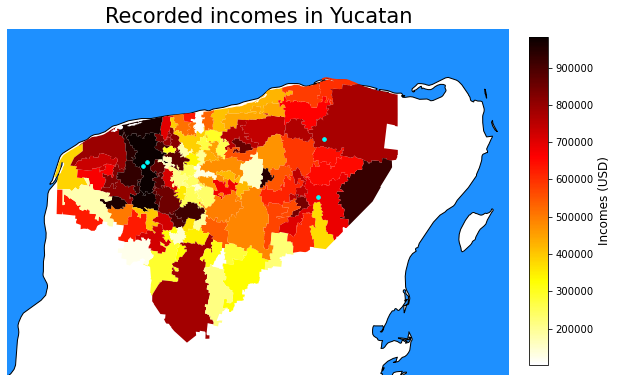

In [9]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

#Plot of the title
title = "Recorded incomes in Yucatan"
plt.title(title, fontsize=21)

#Control of the geographic limits, in geographical coordinates
ax.axis([-90.8, -86.6, 19.3, 22])

#Layers plotting
ocean.plot(ax = ax, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
yucatan.plot(column='sales',  cmap = 'hot_r', ax = ax, zorder = 1)
stores.plot(ax = ax, color = 'cyan', markersize = 13, zorder = 2)

#Axes
ax.axis('off')

#Bar features
min_s = min(yucatan['sales'])
max_s = max(yucatan['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_s , vmax=max_s))
bar._A = []
#Bar position
cax = plt.axes([0.93, 0.18, 0.03, 0.65])   #[xcoord, ycoord, width, long]
#Bar plotting
cbar = fig.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 12)

To be able to write the labels of the stores we need just the coordinates of the points, which we can see them in the stores geodataframe. To th other hand, to know a coordinate within a polygon it is necessary to use the Geopandas *centroid* method and create a new geodataframe with this new geometry, because each geodataframe can only have one column of geometry. <br> *It will send you a warning because the CRS, but it is ok, that is because the coordinates are geographic.*

In [10]:
yucatan['center'] = yucatan['geometry'].centroid
yucatan_centers = yucatan.copy()
yucatan_centers.set_geometry('center', inplace =True)

C:\Users\deemi\miniconda3\envs\geomodelling\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


We just need the coordinates of the municipalities of our interest. In this case: Tekax y Quintana Roo.

In [11]:
ind_tekax = yucatan_centers[yucatan_centers['NOM_MUN']=='Tekax'].index.item()
ind_qroo = yucatan_centers[yucatan_centers['NOM_MUN']=='Quintana Roo'].index.item()

print('Tekax', yucatan_centers['center'][ind_tekax])
print('Quintana Roo', yucatan_centers['center'][ind_qroo])

Tekax POINT (-89.30074416544436 19.93295407833264)
Quintana Roo POINT (-88.63583466805464 20.84269387927304)


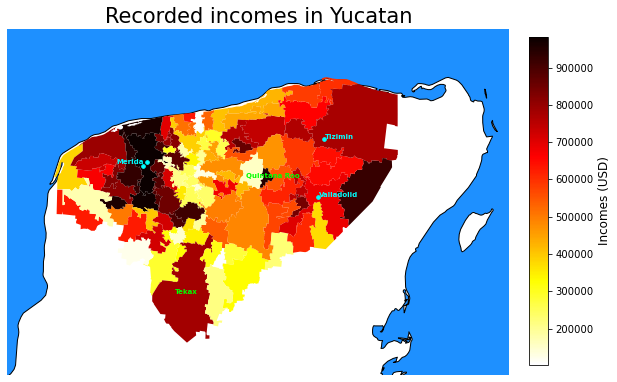

In [12]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

#Plot of the title
title = "Recorded incomes in Yucatan"
plt.title(title, fontsize=21)

#Control of the geographic limits, in geographical coordinates
ax.axis([-90.8, -86.6, 19.3, 22])

#Layers plotting
ocean.plot(ax = ax, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
yucatan.plot(column='sales',  cmap = 'hot_r', ax = ax, zorder = 1)
stores.plot(ax = ax, color = 'cyan', markersize = 13, zorder = 2)

#Plot of the stores' labels
plt.text(-89.89, 20.95, 'Merida', color = 'cyan', fontsize = 7, fontweight = 'bold')
plt.text(-88.19, 20.69, 'Valladolid', color = 'cyan', fontsize = 7, fontweight = 'bold')
plt.text(-88.145, 21.14, 'Tizimin', color = 'cyan', fontsize = 7, fontweight = 'bold')

#Plot of the municipality' labels of interest
plt.text(-89.4, 19.93, 'Tekax', color = 'lime', fontsize = 7, fontweight = 'bold')
plt.text(-88.8, 20.84, 'Quintana Roo', color = 'lime', fontsize = 7, fontweight = 'bold')

#Axes
ax.axis('off')

#Bar features
min_s = min(yucatan['sales'])
max_s = max(yucatan['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_s , vmax=max_s))
bar._A = []
#Bar position
cax = plt.axes([0.93, 0.18, 0.03, 0.65])   #[xcoord, ycoord, width, long]
#Bar plotting
cbar = fig.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 12)

## Plotting of Merida

Reading and with the preview of the Merida zip codes shapefile. We do not have to remove any column to this geodataframe. <br> We just have to rename the column 'zip_code_s' to 'sales'.

In [13]:
merida = gpd.read_file('merida_cp/zip_code.shp')
merida.rename(columns = {'zip_code_s':'sales'}, inplace = True)
merida

,d_cp,sales,geometry
0,97070,22000,"POLYGON ((-89.63104 20.99562, -89.63054 20.995..."
1,97003,4000,"POLYGON ((-89.64461 20.94975, -89.64479 20.950..."
2,97059,2000,"POLYGON ((-89.61898 20.99106, -89.61880 20.989..."
3,97080,7000,"POLYGON ((-89.61266 20.98199, -89.61341 20.982..."
4,97088,8000,"POLYGON ((-89.61341 20.98207, -89.61266 20.981..."
...,...,...,...
139,97218,1000,"POLYGON ((-89.63733 20.99480, -89.63723 20.994..."
140,97308,1000,"POLYGON ((-89.57766 21.19031, -89.57632 21.189..."
141,97316,1000,"POLYGON ((-89.54429 20.85316, -89.54429 20.853..."
142,97303,0,"POLYGON ((-89.71307 21.05039, -89.71384 21.053..."


To see what limits has the area which we want to show, first we do a simple plot.

<AxesSubplot:>

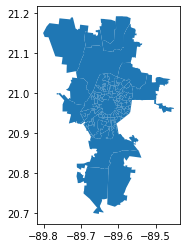

In [14]:
merida.plot()

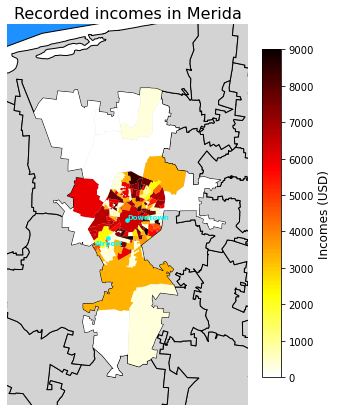

In [15]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

#Plot of the title
title = "Recorded incomes in Merida"
plt.title(title, fontsize=16)

#Control of the geographic limits, in geographical coordinates
ax.axis([-89.85, -89.41, 20.65, 21.3])

#Layers plotting
ocean.plot(ax = ax, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
yucatan.plot(ax = ax, color = 'lightgray', edgecolor = 'black', zorder = 1)
merida.plot(ax = ax, column='sales',  cmap = 'hot_r', zorder = 2)
stores.plot(ax = ax, color = 'cyan', markersize = 13, zorder = 3)

#Text
plt.text(-89.63, 20.967, 'Downtown', color = 'cyan', fontsize = 7, fontweight = 'bold')
plt.text(-89.69, 20.922, 'Airport', color = 'cyan', fontsize = 7, fontweight = 'bold')

#Axes
ax.axis('off')

#Bar features
min_sm = min(merida['sales'])
max_sm = max(merida['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_sm, vmax=max_sm))
bar._A = []
#Bar position
cax = plt.axes([0.72, 0.18, 0.03, 0.65])   #[xcoord, ycoord, width, long]
#Bar plotting
cbar = fig.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 12)

To the last plotting, we need all the shapefile of the country, Mexico, to give a spatial context. And again we see the limits of its geographic coordinates.

<AxesSubplot:>

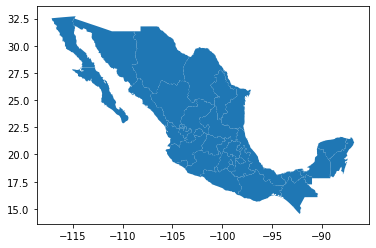

In [16]:
mexico = gpd.read_file('mexico/mexico.shp')
mexico = mexico.drop(columns = ['AREA','PERIMETER','COV_','COV_ID','CAPITAL','RASGO_GEOG','CVE_EDO'])
mexico.plot()

In [17]:
import matplotlib.gridspec as gridspec

(-118.0, -86.0, 13.0, 33.5)

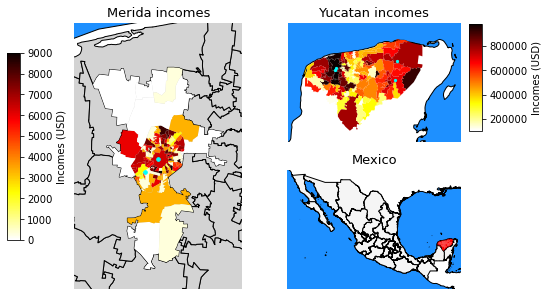

In [18]:
fig2 = plt.figure(constrained_layout=True)
submap = fig2.add_gridspec(2, 2)

#-------------------------MERIDA SUBMAP-------------------------
map_mer = fig2.add_subplot(submap[:, 0])
map_mer.set_title('Merida incomes', fontsize = 13)

#Control of the geographic limits, in geographical coordinates
map_mer.axis([-89.85, -89.41, 20.65, 21.3])

#Layers plotting
ocean.plot(ax = map_mer, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
yucatan.plot(ax = map_mer, color = 'lightgray', edgecolor = 'black', zorder = 1)
merida.plot(ax = map_mer, column='sales',  cmap = 'hot_r', zorder = 2)
stores.plot(ax = map_mer, color = 'cyan', markersize = 13, zorder = 3)

#Axes
map_mer.axis('off')

#Bar features
min_sm = min(merida['sales'])
max_sm = max(merida['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_sm, vmax=max_sm))
bar._A = []
#Bar position
cax = plt.axes([-0.1, 0.18, 0.03, 0.65])   #[xcoord, ycoord, width, long]
#Bar plotting
cbar = fig2.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 10)


#------------------------YUCATAN SUBMAP ------------------------
map_yuc = fig2.add_subplot(submap[0, 1])
map_yuc.set_title('Yucatan incomes', fontsize = 13)

#Control of the geographic limits, in geographical coordinates
map_yuc.axis([-90.8, -86.6, 19.3, 22])

#Layers plotting
ocean.plot(ax = map_yuc, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
yucatan.plot(ax = map_yuc, column='sales',  cmap = 'hot_r', zorder = 1)
stores.plot(ax = map_yuc, color = 'cyan', markersize = 5, zorder = 2)

#Axes
map_yuc.axis('off')

#Bar features
min_sy = min(yucatan['sales'])
max_sy = max(yucatan['sales'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_sy , vmax=max_sy))
bar._A = []
#Bar position
cax = plt.axes([0.97, 0.56, 0.03, 0.37])   #[xcoord, ycoord, width, long]
#Bar plotting
cbar = fig2.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 10)

#-------------------------MEXICO SUBMAP-------------------------
map_mex = fig2.add_subplot(submap[1, 1])
map_mex.set_title('Mexico', fontsize = 13);

#Control of the geographic limits, in geographical coordinates
map_mex.axis([-118, -86, 13, 33.5])

#Layers plotting
ocean.plot(ax = map_mex, color = 'dodgerblue', edgecolor = 'black', zorder = 0)
mexico.plot(ax = map_mex, color = 'whitesmoke', edgecolor = 'black', zorder = 1)
yucatan.plot(ax = map_mex, color = 'red', zorder = 2)

#Axes
map_mex.axis('off')